In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load dataset
sales = pd.read_csv('vgsales.csv')

# Data Info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [50]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [51]:
sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


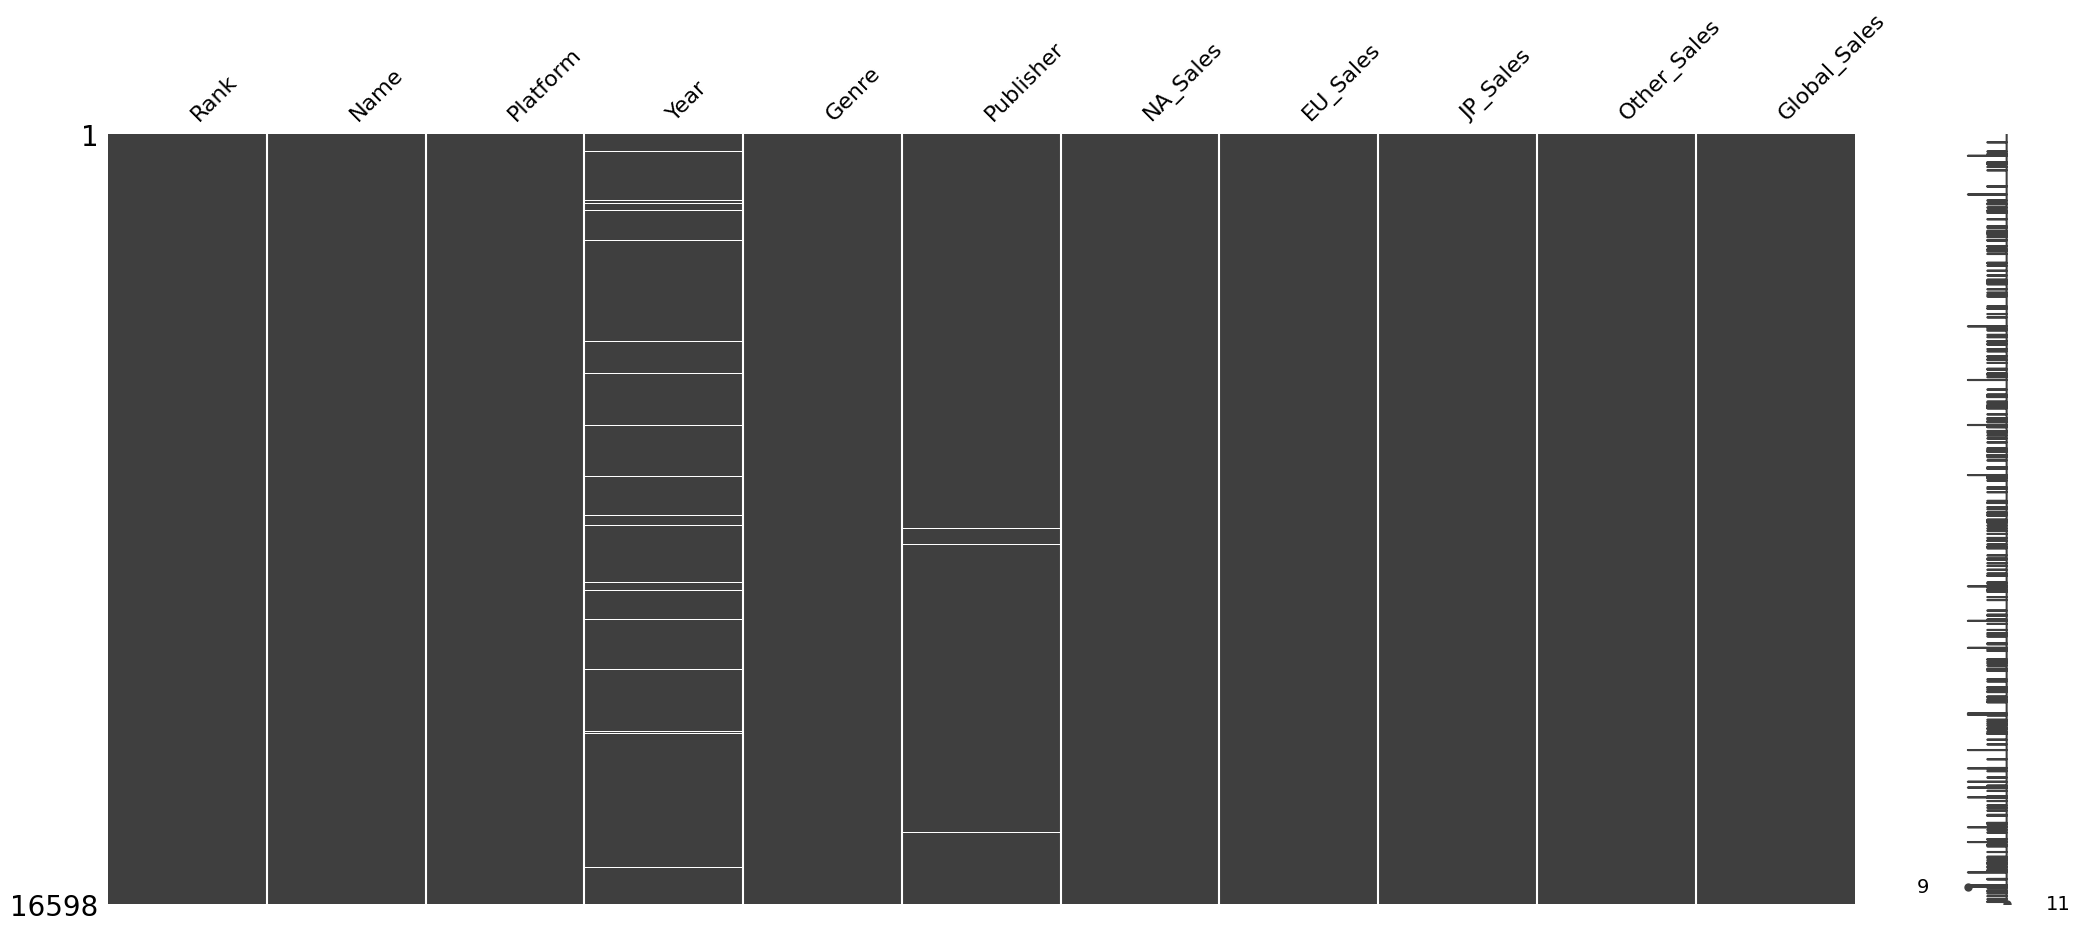

In [52]:
# Visualize missing data
msno.matrix(sales)
sales.dropna(how="any", inplace=True)

In [53]:
# Convert 'Year' to int
sales['Year'] = sales['Year'].astype(int)

In [54]:
# Helper function for statistics
def print_statistics(column_name, column_data):
    print(f"Statistics for {column_name}:")
    print(f"Mean: {column_data.mean()}")
    print(f"Standard Deviation: {column_data.std()}")
    print(f"Minimum: {column_data.min()}")
    print(f"Maximum: {column_data.max()}")
    print(f"Median: {column_data.median()}")
    print("-" * 40)

# Loop through relevant columns and print statistics
for column_name in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']:
    column_data = sales[column_name]
    print_statistics(column_name, column_data)

# Convert sales columns to integers
sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].astype(int)

Statistics for NA_Sales:
Mean: 0.26564667607881653
Standard Deviation: 0.8224321259139065
Minimum: 0.0
Maximum: 41.49
Median: 0.08
----------------------------------------
Statistics for EU_Sales:
Mean: 0.14773126266036463
Standard Deviation: 0.5093029304674029
Minimum: 0.0
Maximum: 29.02
Median: 0.02
----------------------------------------
Statistics for JP_Sales:
Mean: 0.0788330980295869
Standard Deviation: 0.31187949983649993
Minimum: 0.0
Maximum: 10.22
Median: 0.0
----------------------------------------
Statistics for Global_Sales:
Mean: 0.5409103185808114
Standard Deviation: 1.5673445067837146
Minimum: 0.01
Maximum: 82.74
Median: 0.17
----------------------------------------


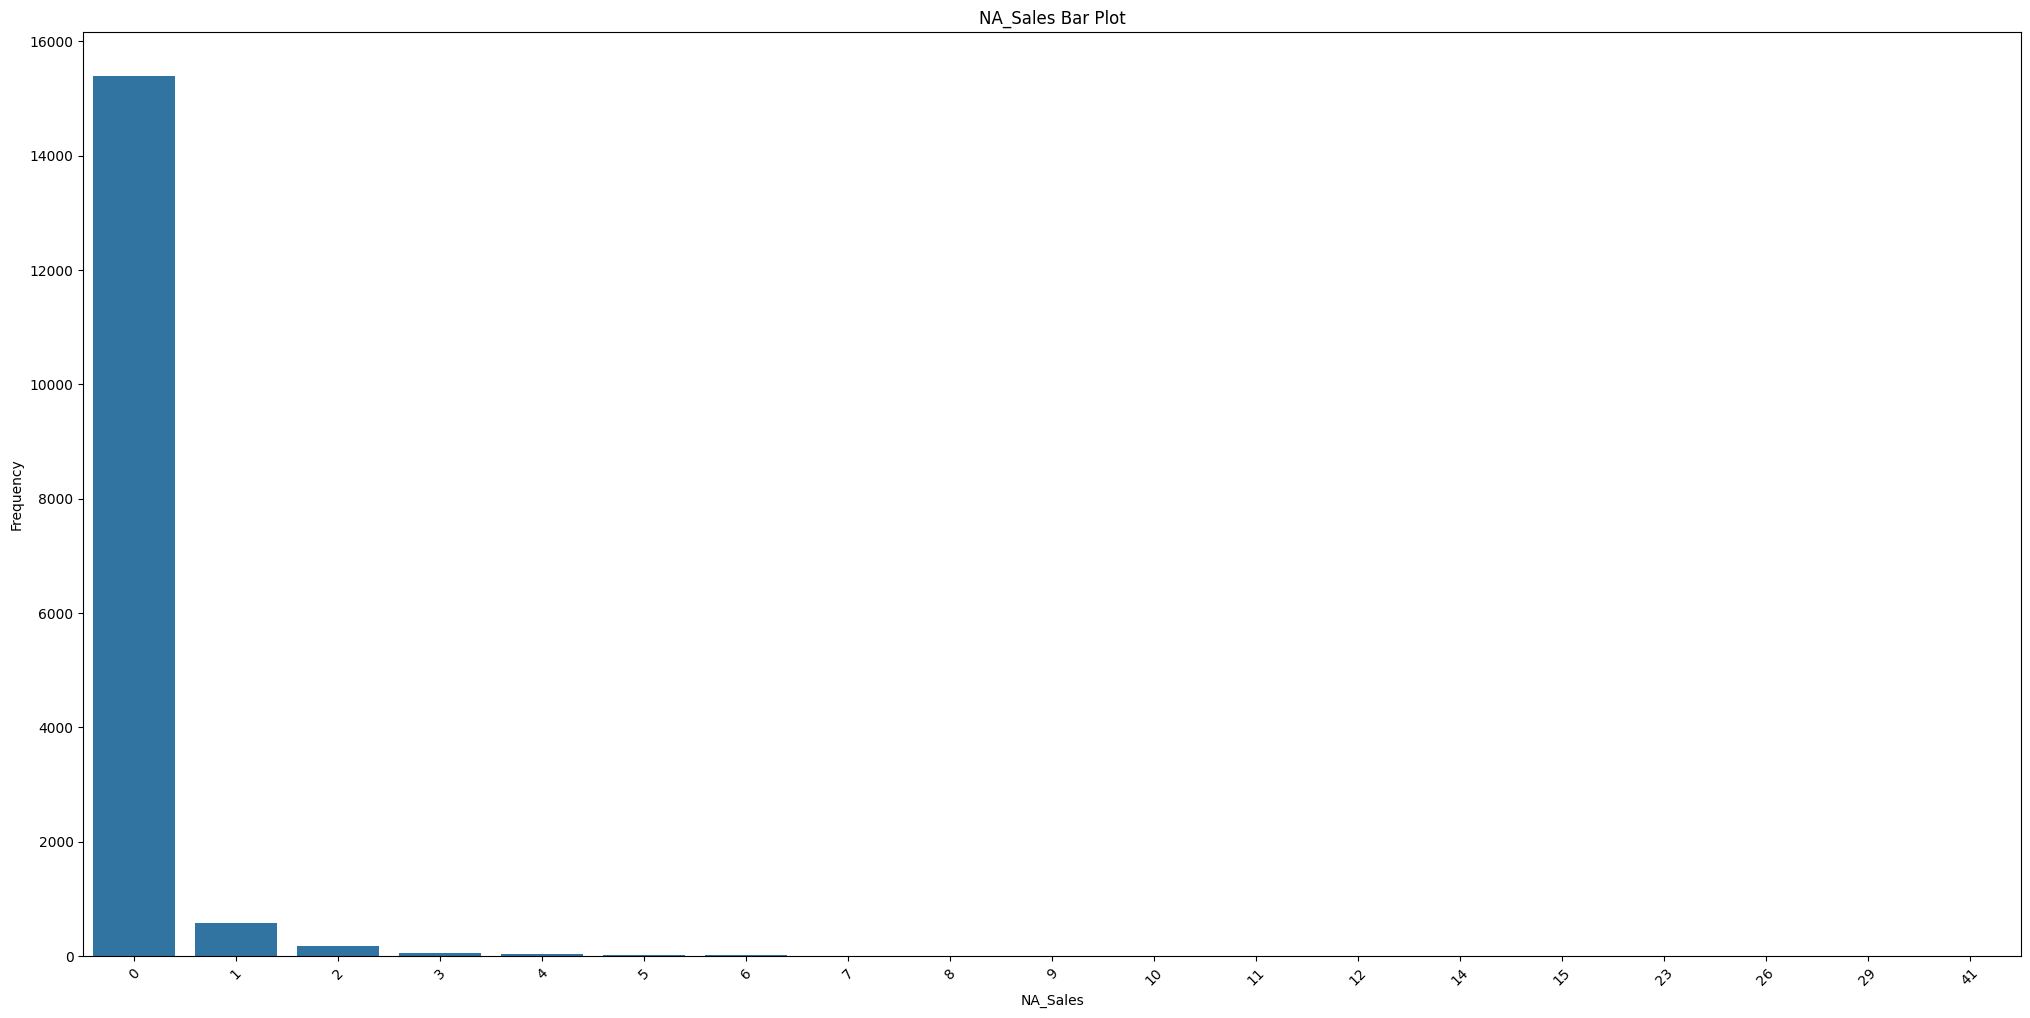

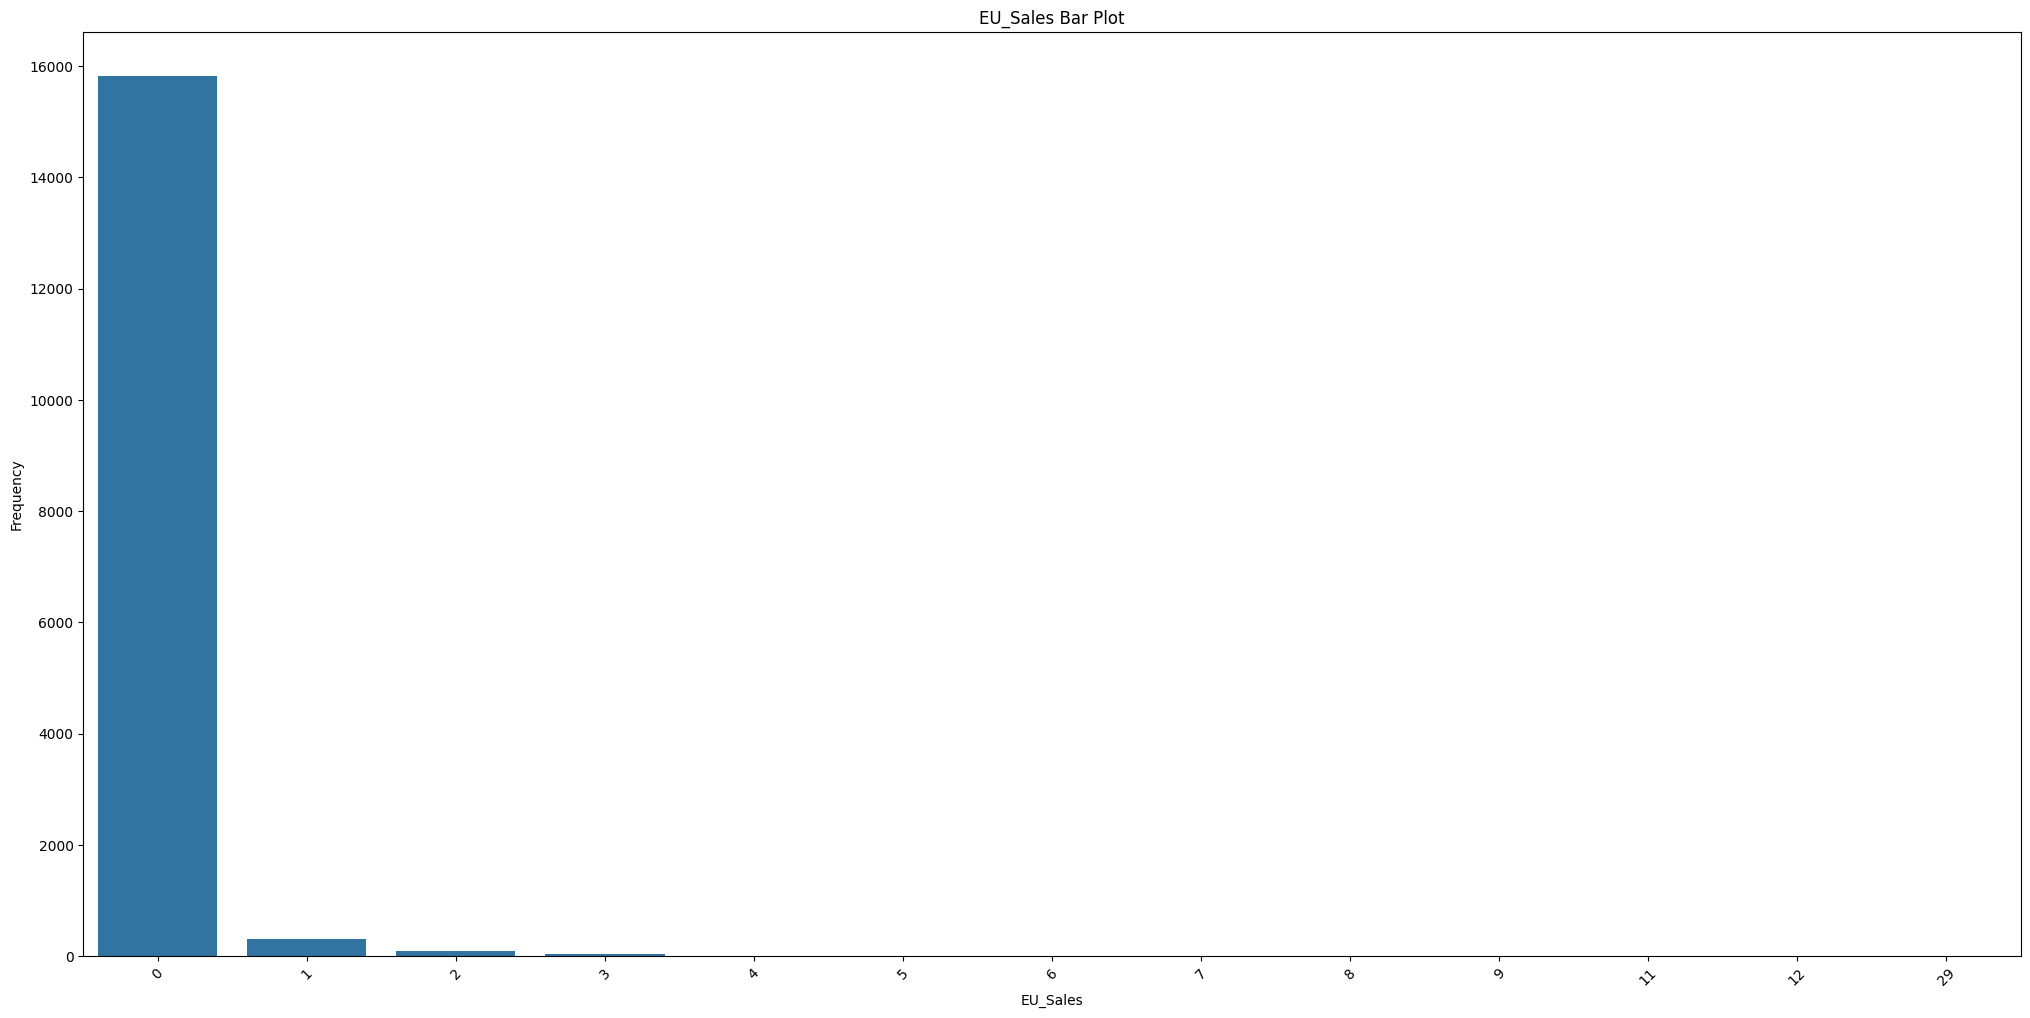

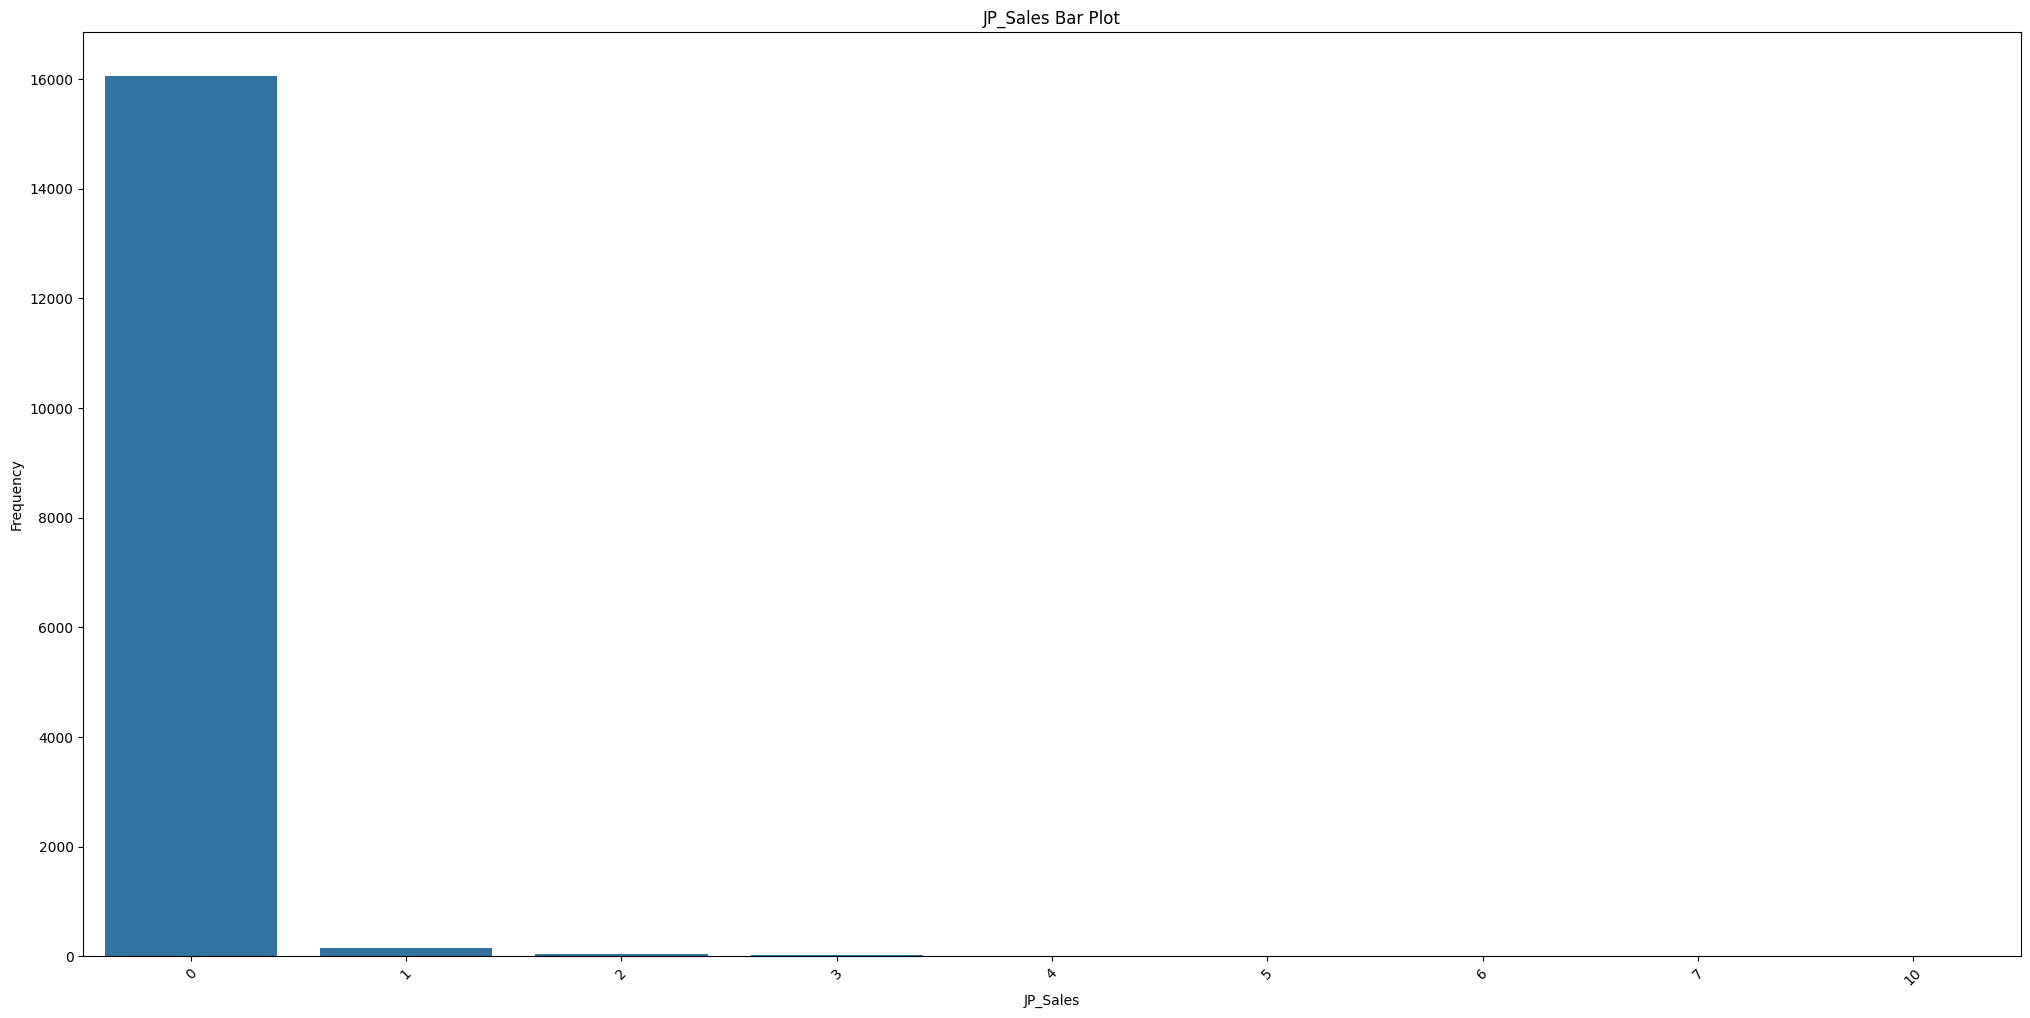

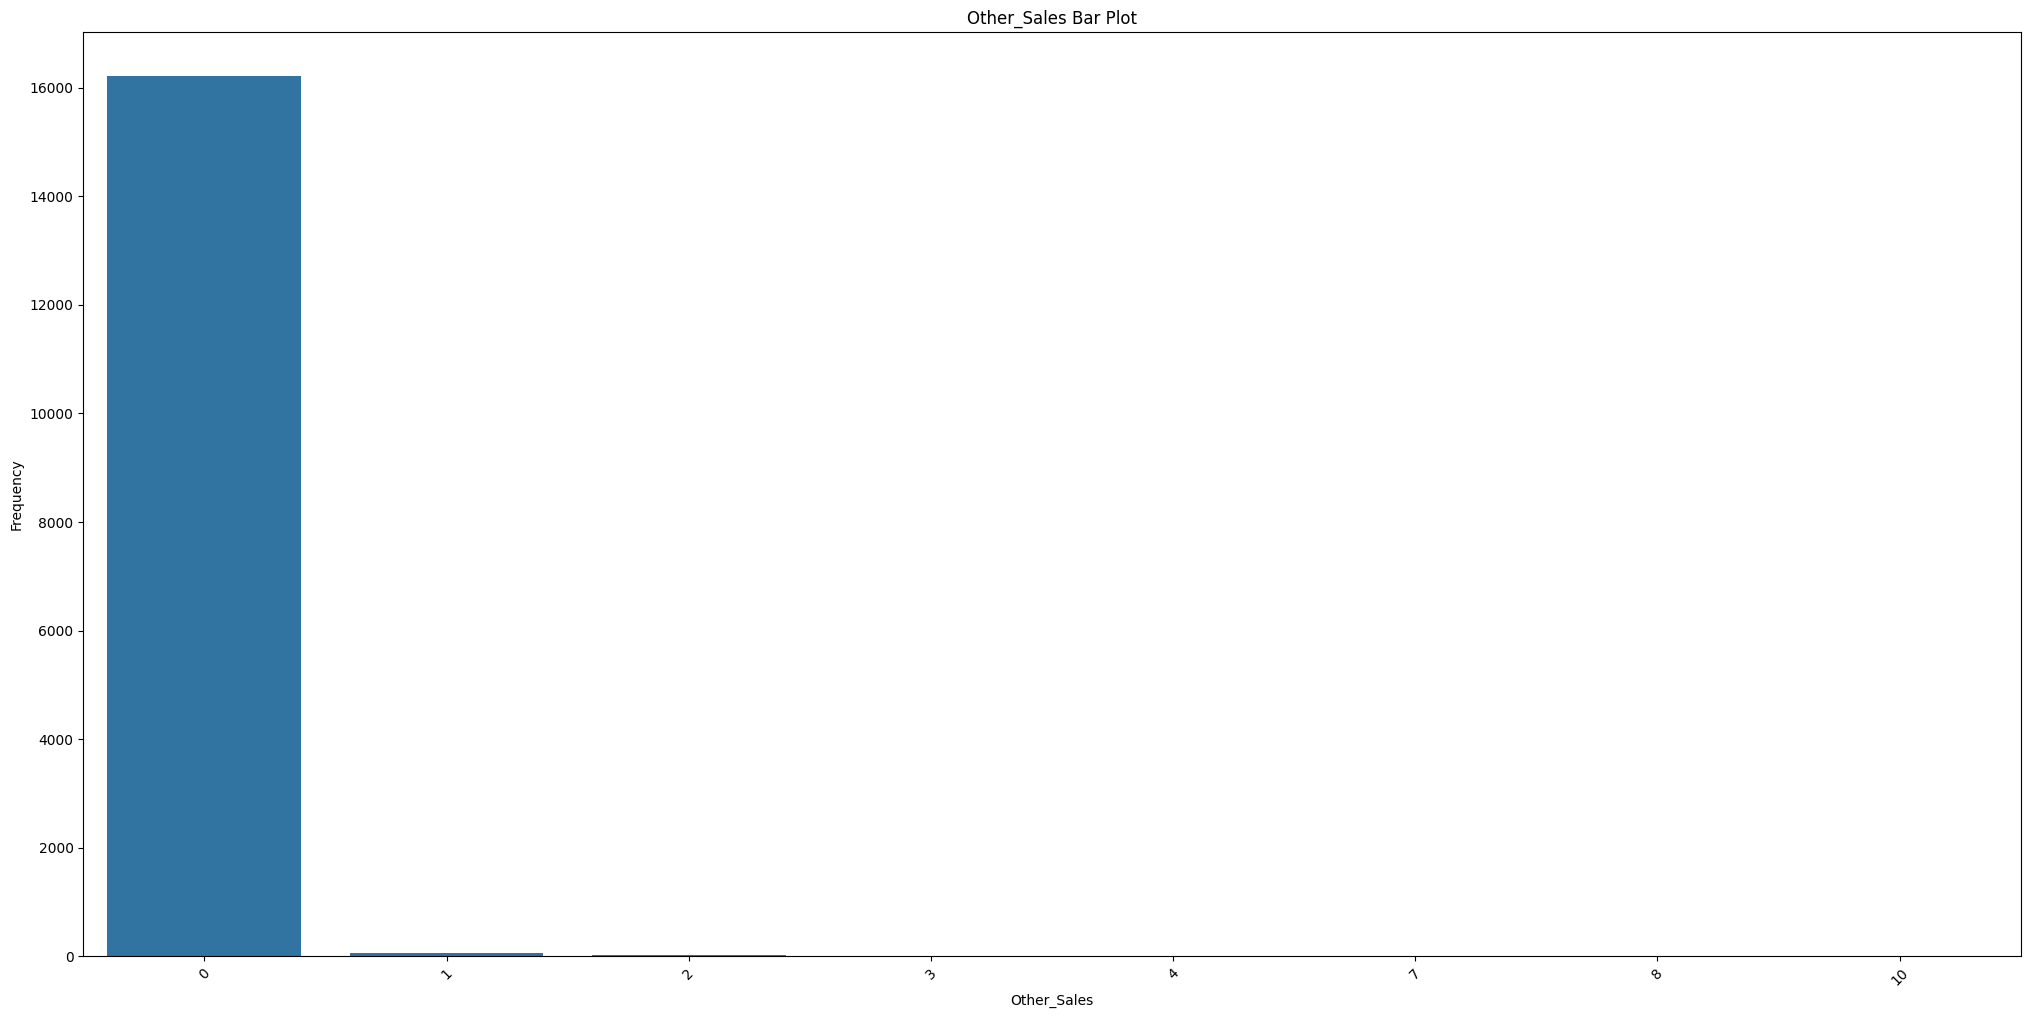

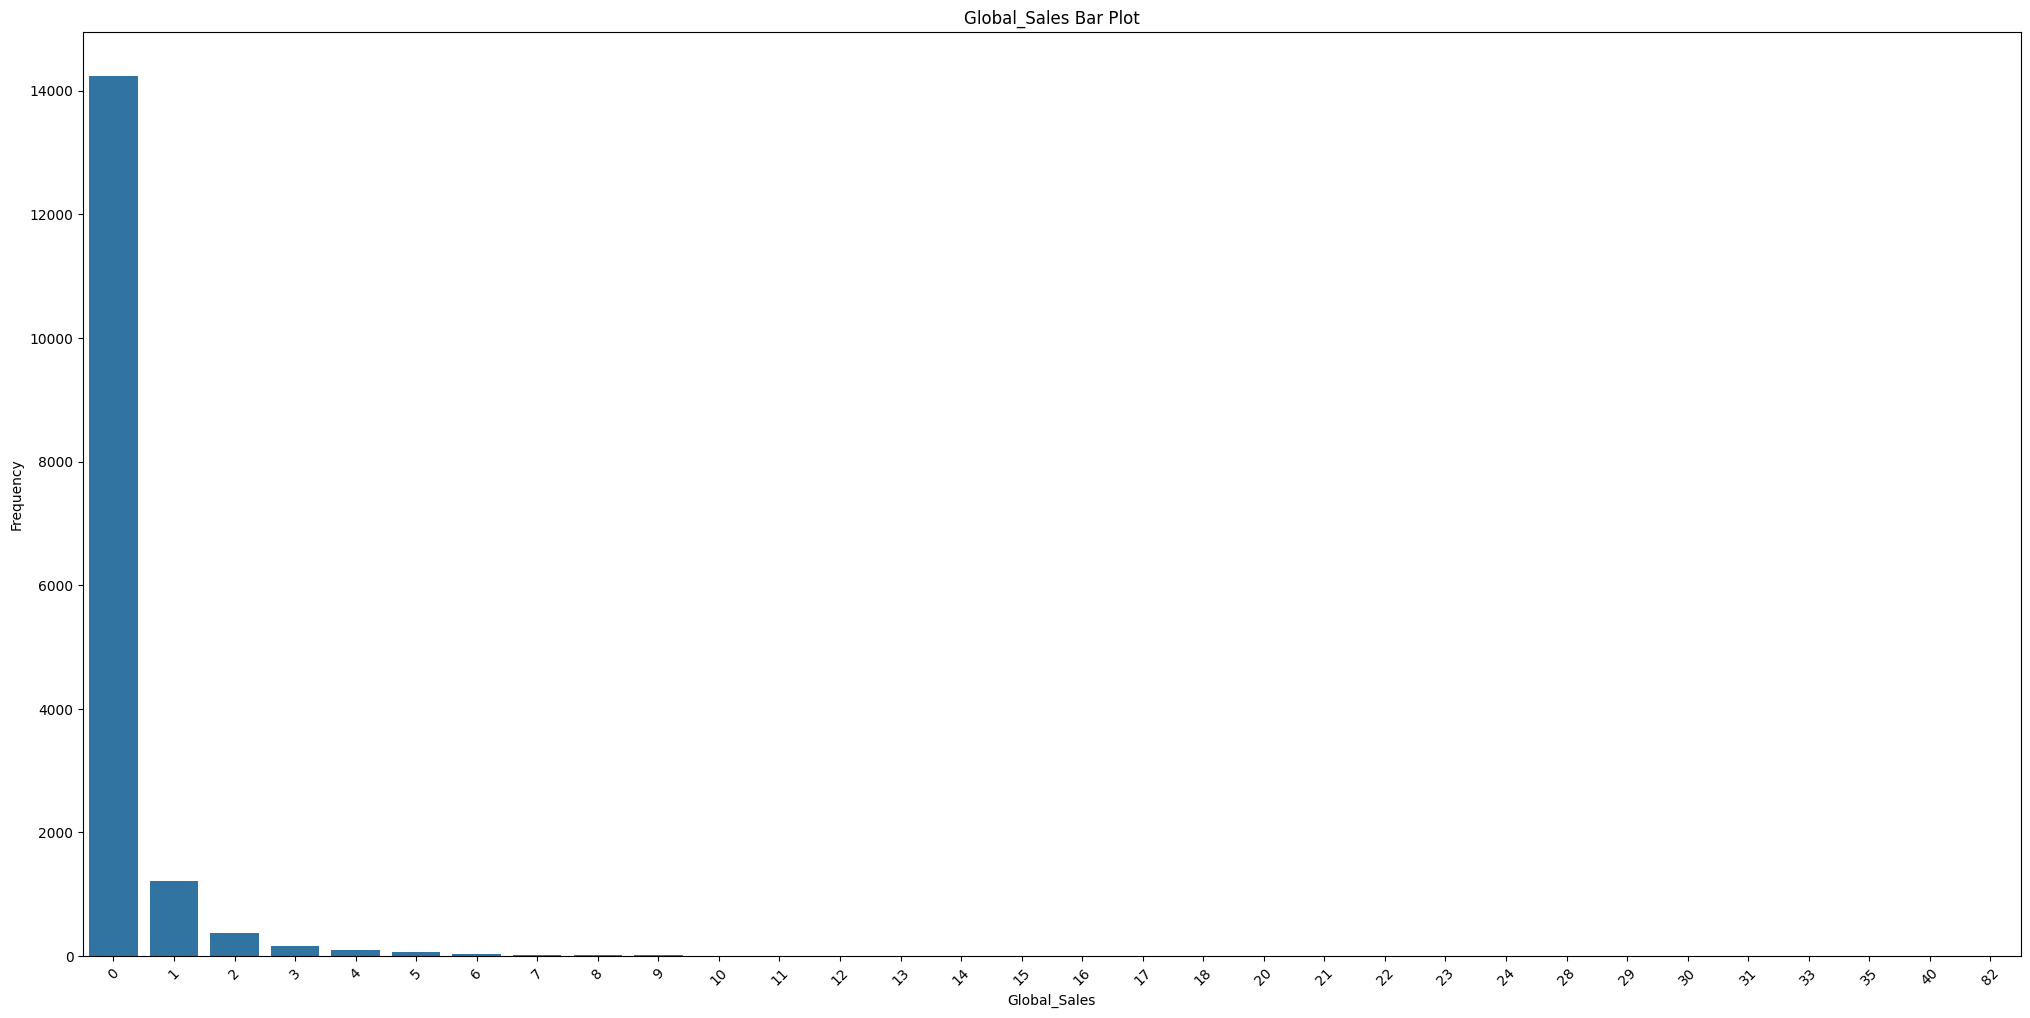

In [55]:
# Helper function for bar plot
def plot_sales_distribution(sales_column, column_name):
    plt.figure(figsize=(25,12))
    sns.barplot(x=sales[sales_column].value_counts().index, y=sales[sales_column].value_counts().values)
    plt.xlabel(f'{column_name}')
    plt.ylabel('Frequency')
    plt.title(f'{column_name} Bar Plot')
    plt.xticks(rotation=45)
    plt.show()

# Plot bar plots for sales distribution
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    plot_sales_distribution(col, col)

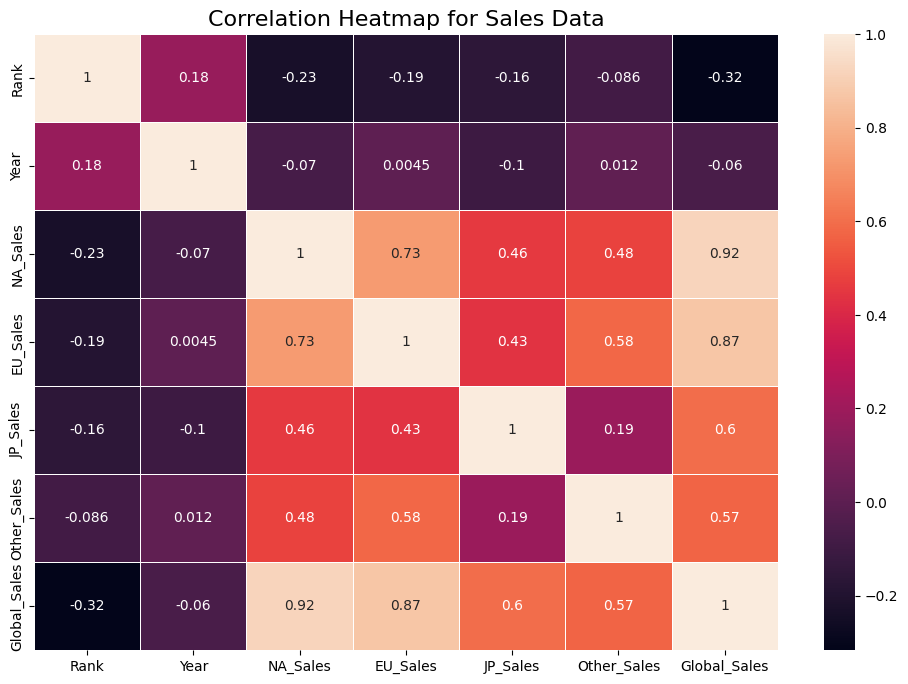

In [56]:
# Correlation heatmap
numeric_sales = sales.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_sales.corr(), annot=True, linewidths=0.5)
plt.title('Correlation Heatmap for Sales Data', fontsize=16)
plt.show()